<a href="https://colab.research.google.com/github/sahibprovat/TensorFlow_Deeplearning_Tutorial/blob/main/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some
other combination of variables, even shorter... predicting a number.

In [1]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data to view and fit

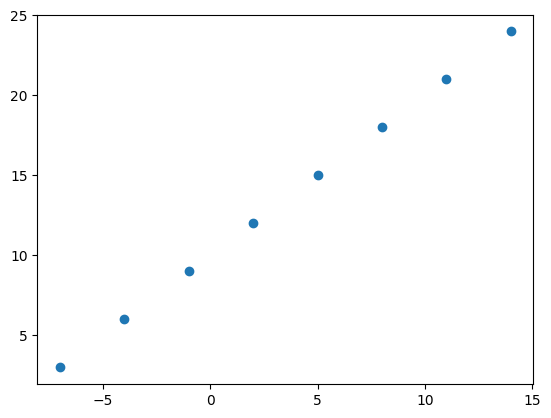

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x, y);

In [3]:
 y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
x[0], y[0]

(-7.0, 3.0)

In [6]:
x[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = x.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
x[0].ndim

0

In [10]:
# Turn our numpy arrays into tensors
x = tf.constant(x, dtype = tf.float32)
y = tf.constant(y, dtype = tf.float32)
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

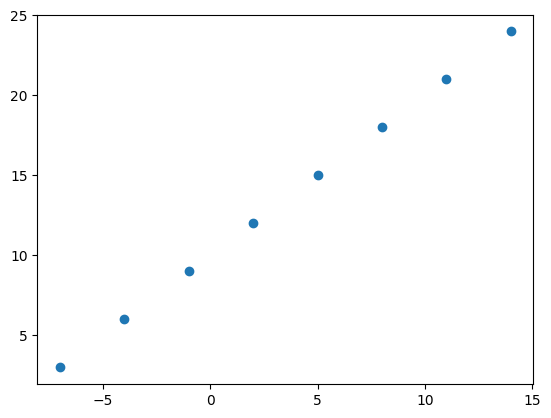

In [12]:
plt.scatter(x, y )

## Steps in modelling with TensorFlow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss funtion (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the pattems its leaming) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels).

Steps in modelling with TensorFlow

1.  Get data ready (turn into tensors)
2. Build or pick a pretrained model (to suit your problem)
3. Fit the model to the data and make a prediction
4. Evaluate the model
5. Improve through experimentation
6. Save and reload your trained model




In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,    # mae is mean absolute error
              optimizer = tf.keras.optimizers.SGD(),   # SGD is short for stochastic gradient descent
              metrics = ["mae"])

# Fit the model
model.fit(tf.expand_dims(x, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 867ms/step - loss: 12.9820 - mae: 12.9820
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 12.8495 - mae: 12.8495
Epoch 3/5
1/1 [==============================] - 0s 19ms/step - loss: 12.7170 - mae: 12.7170
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 12.5845 - mae: 12.5845
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 12.4520 - mae: 12.4520


In [14]:
# Check the x and y
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try to make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 153ms/step


array([[5.5408783]], dtype=float32)

In [16]:
y_pred + 7

array([[12.540878]], dtype=float32)

Steps in modelling with TensorFlow

1. Construct or import a pretrained model relevant to your problem
2. Compile the model (prepare it to be used with data)
* Loss — how wrong your model's predictions are compared to the truth labels (you want to minimise this).
* Optimizer — how your model should update its internal patterns to better its predictions.
*  Metrics — human interpretable values for how well your model is doing.
3. Fit the model to the training data so it can discover patterns
*  Epochs —how many times the model will go through all of the training examples.
4. Evaluate the model on the test data (how reliable are our model's predictions?)

## Improving our model

We can improve our model, by altering the steps we took to
create a model.
1. **Creating a model** — here we might add more layers,increase the number of hidden units (all called neurons)within each of the hideen layers, change the activationfunction of each layer.
2. **Compiling a model** — here we might change the
optimization function or perhaps the ** learning rate* * of the optimization function.
3. **Fitting a model** -here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [17]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model (this time we'll train for longer )
model.fit(tf.expand_dims(x, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 705ms/step - loss: 15.1313 - mae: 15.1313
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 14.8963 - mae: 14.8963
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 14.7638 - mae: 14.7638
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 14.6313 - mae: 14.6313
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 14.4988 - mae: 14.4988
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 14.3663 - mae: 14.3663
Epoch 7/100
1/1 [==============================] - 0s 24ms/step - loss: 14.2338 - mae: 14.2338
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 14.1013 - mae: 14.1013
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 13.9688 - mae: 13.9688
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 13.8363 - mae: 13.8363
Epoch 11/100
1/1 [==============================] 

In [18]:
# Reminds ourselves of the data
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's see if our model's prediction has improved....
model.predict([17.0])

1/1 [==============================] - 0s 261ms/step


array([[29.781652]], dtype=float32)

In [20]:
# Let's see if we can male another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics = ["mae"])

# 3. Fit the model (this time we'll train for longer )
model.fit(tf.expand_dims(x, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 903ms/step - loss: 13.4011 - mae: 13.4011
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.3344 - mae: 13.3344
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 13.2678 - mae: 13.2678
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 13.2012 - mae: 13.2012
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 13.1347 - mae: 13.1347
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 13.0682 - mae: 13.0682
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 13.0017 - mae: 13.0017
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 12.9352 - mae: 12.9352
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 12.8687 - mae: 12.8687
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 12.8023 - mae: 12.8023
Epoch 11/100
1/1 [==============================] 

In [21]:
# Let's see if our model's prediction has improved....
model.predict([17.0])

1/1 [==============================] - 0s 122ms/step


array([[31.243664]], dtype=float32)

## Evaluate a model

In practice, a typical workflow you'll go through when building a model is:

'''
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweat a model -> fit it -> evaluate it.....
'''


When it comes to evaluate... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data — what data are we working with? What does it 100k like?
* The model itself — what does our model look like?
* The training Of a model — how does a model perform while it learns ?
* The predictions of the modle — how do the predictions of a model line up against the ground truth (the original labels) ?

In [22]:
# Make a bigger dataset
x = tf.range(-100, 100, 4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [23]:
# make a label for the dataset
y = x + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

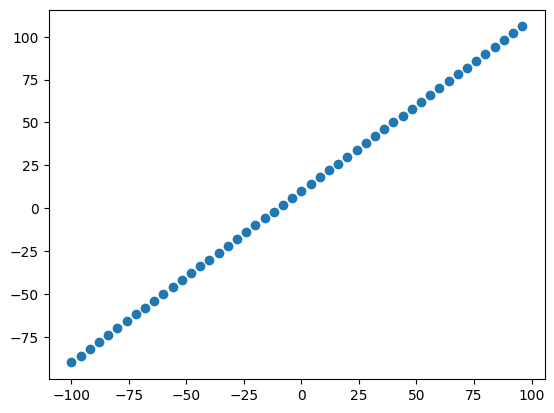

In [24]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(x, y)

## The 3 sets.
* **Training set** — the model learns from this data, which is typically 70—80% of the total data you have available.
* **Validation set** — the model gets tuned on this data, which is typically 10—15% Of the data available.
* **Test Set** — the model gets evaluated on this data to test what is has learned, this set is typically 10—15% Of the total data available.

In [25]:
# Check the length of how many samples we have
len(x)

50

In [26]:
## Split the data into train and test sets
x_train = x[:40]   # First 40 are training samples (80% of the data)
y_train = y[:40]

x_test = x[40:]    # Last 10 are testting samples (20% of the data)
y_test = y[40:]

len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

## Visualize the data

Now we've got our data in training and test sets...let's visualize it again...

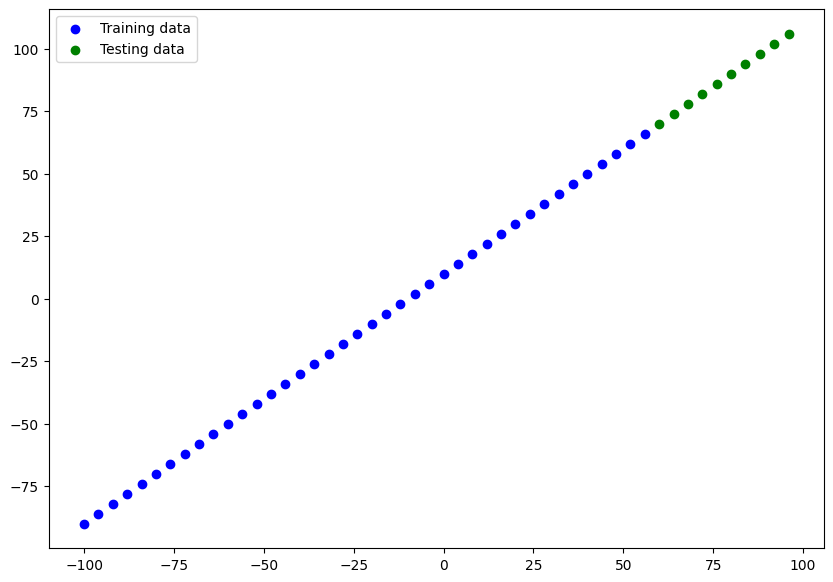

In [27]:
plt.figure(figsize = (10, 7))

# Plot training data in blue
plt.scatter(x_train, y_train, c = "b", label = "Training data")

# plot test data in green
plt.scatter(x_test, y_test, c = "g", label = "Testing data")

# Show a legend
plt.legend();

In [28]:
# Let's have a look at how to build a neural network for our data

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# # 3. Fit the model (this time we'll train for longer )
# model.fit(tf.expand_dims(x_train, axis = -1), y_train, epochs = 100)


## Visualize the model


In [29]:
# model.summary()

In [30]:
x[0], y[0]
# Just 1 sample. one for one, thats why input_shape = 1

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [31]:
# Let's create a model which builds automatically by defining the imput_shape argue
tf.random.set_seed(42)

# 1. Creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name = "input_layer"),
    tf.keras.layers.Dense(1, name = "output_layer")
], name = "model_1")

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])


In [32]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


*  Total params - total number of parameters in the model.
*  Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non—trainable params — these parameters aren 't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**) .

In [33]:
# Let's fit our model to the training data
model.fit(x_train, y_train, epochs = 100, verbose = 0)

In [34]:
# Get a summary of our mdoel
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


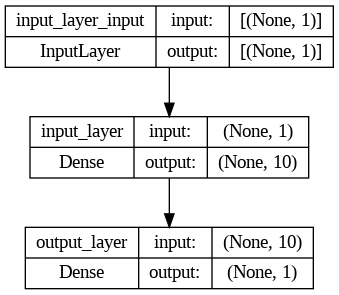

In [35]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True)

 ## Visualization our model's predictions

 To visualize predictions, it's a good idea to plot them against the ground labels.

 Often you'll see this in the form of 'y_test' or 'y_true' versus 'y_pred' (ground truth versus your model's predictions)

In [36]:
# Make some predictions
y_pred = model.predict(x_test)
y_pred

1/1 [==============================] - 0s 51ms/step


array([[ 91.242455],
       [ 97.20074 ],
       [103.15902 ],
       [109.1173  ],
       [115.075584],
       [121.033875],
       [126.99215 ],
       [132.95044 ],
       [138.9087  ],
       [144.867   ]], dtype=float32)

In [37]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If you think you're going to use same kind of funtionality in the future, its a good idea to turn it into a function.

In [38]:
# Let's create a plotting function
def plot_prediction(train_data = x_train,
                    train_labels = y_train,
                    test_data = x_test,
                    test_labels = y_test,
                    predictions = y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize = (10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", label = "Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c ="g", label = "Test data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c = "r", label = "Predictions")
  # Show the legend
  plt.legend();

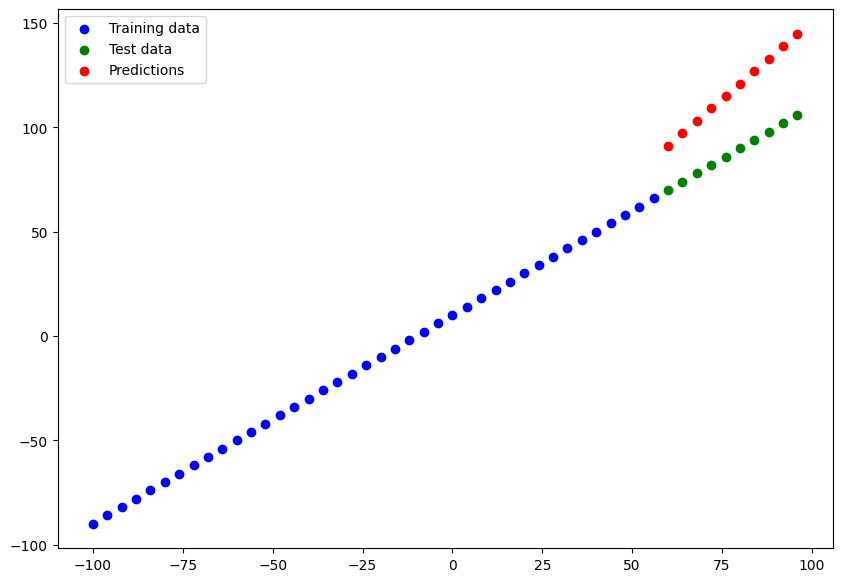

In [39]:
plot_prediction()

## Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we've working on a regression, two fo the main metrics:

* MAE: mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE: mean square error, "square the average errors"

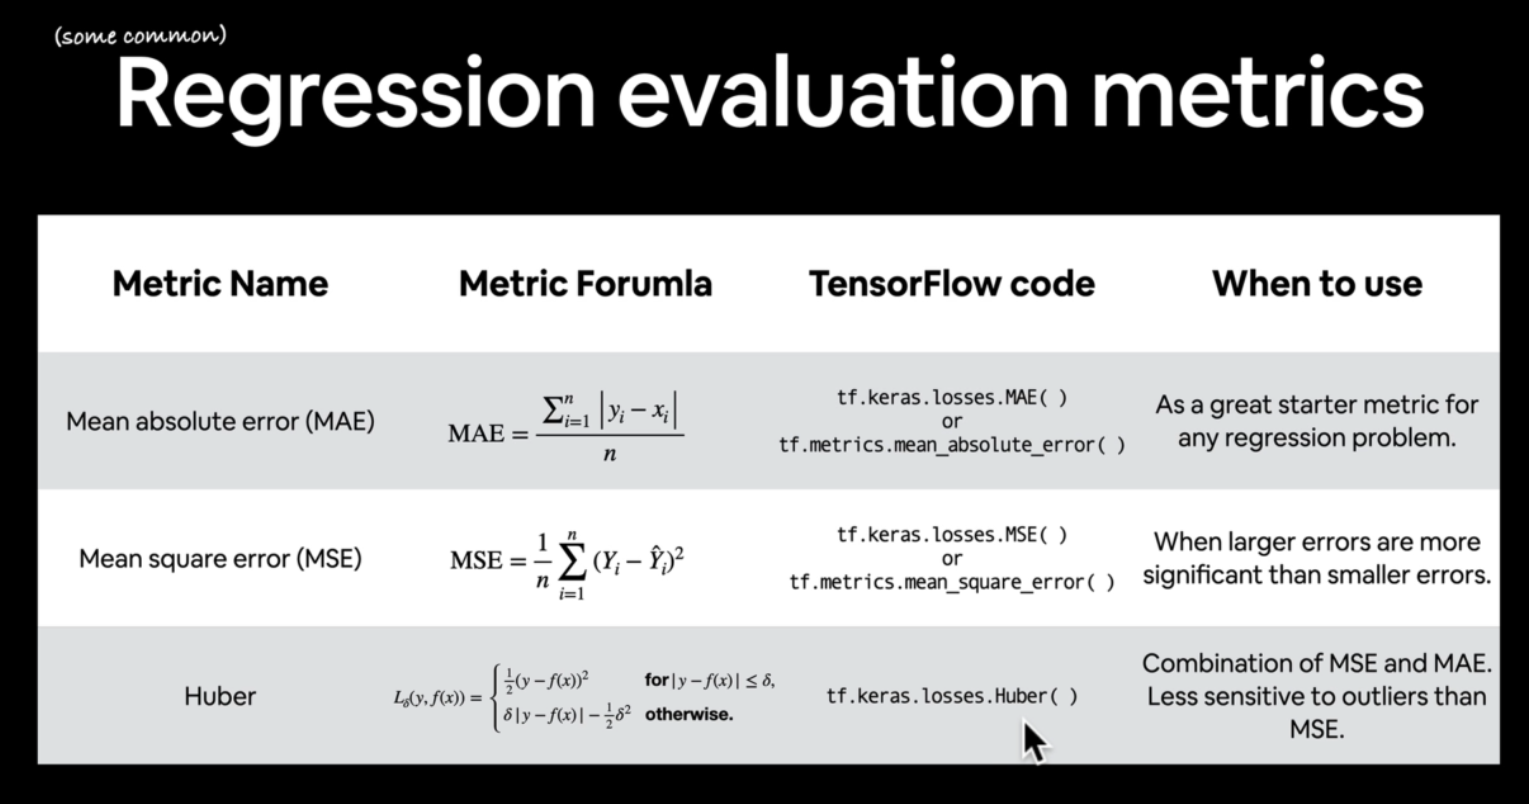

In [40]:
# Evaluate the model on the test
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 147ms/step - loss: 30.0547 - mae: 30.0547


[30.054723739624023, 30.054723739624023]

In [41]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 91.242455],
       [ 97.20074 ],
       [103.15902 ],
       [109.1173  ],
       [115.075584],
       [121.033875],
       [126.99215 ],
       [132.95044 ],
       [138.9087  ],
       [144.867   ]], dtype=float32)>

In [42]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 91.242455,  97.20074 , 103.15902 , 109.1173  , 115.075584,
       121.033875, 126.99215 , 132.95044 , 138.9087  , 144.867   ],
      dtype=float32)>

In [43]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [44]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=30.054728>

In [45]:
# Calculate the mean square error (MSE)
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                   y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=934.9243>

In [46]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true,
                                        y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true,
                                       y_pred = tf.squeeze(y_pred))

## Running experiments to improve our model

Build a model -> fit it -> evaluate it —> tweak it -> improve our model -> evaluate it —> tweak it fit it —> fit it —> evaluate it......

1. Get more data — get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels)

2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

In [47]:
x_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

## let's do 3 modelling experiments:

1. 'model 1' - same as the original model, 1 layer, trained for 100 epochs.
2. 'model 2' - 2 layers, trained for 100 epochs
3. 'model 3' - 2 layers, trained for 500 epochs  

 ## Build **Model 1**

In [48]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the mddel
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# fit the model
model_1.fit(tf.expand_dims(x_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 28.6710 - mae: 28.6710
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 8.7468 - mae: 8.7468
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1162 - mae: 11.1162
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 9.5203 - mae: 9.5203
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.4220 - mae: 10.4220
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.6546 - mae: 9.6546
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 8.7583 - mae: 8.7583
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0634 - mae: 9.0634
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 19.2156 - mae: 19.2156
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.3748 - mae: 10.3748
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - lo

1/1 [==============================] - 0s 54ms/step


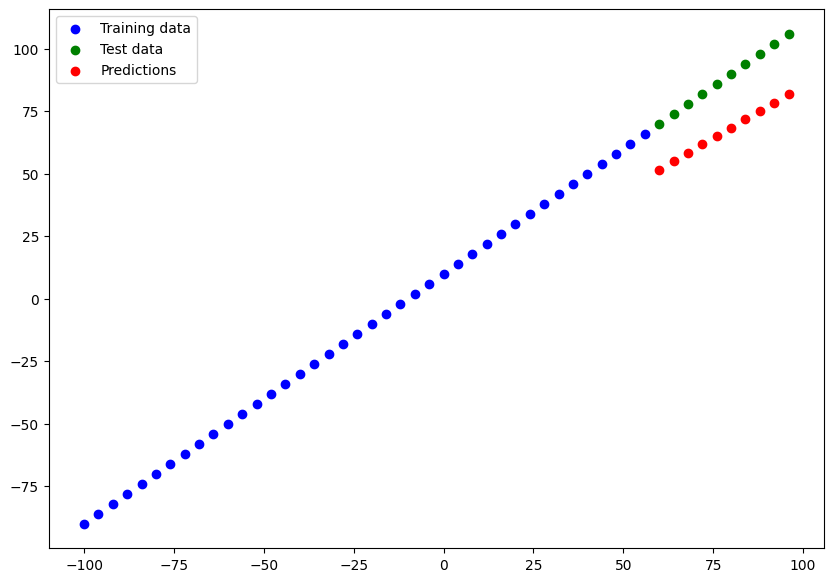

In [49]:
# Make and plot predictions
y_preds_1 = model_1.predict(x_test)
plot_prediction(predictions = y_preds_1)

In [50]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=21.254217>,
 <tf.Tensor: shape=(), dtype=float32, numpy=455.1708>)

## Build **model 2**

In [51]:
# set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(x_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 38.2448 - mse: 2245.7229
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 24.1495 - mse: 763.9772
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 23.7141 - mse: 809.0551
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 13.9264 - mse: 292.1573
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 21.4316 - mse: 666.7348
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 10.2877 - mse: 119.6314
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2411 - mse: 152.6597
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1103 - mse: 162.5375
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 40.7029 - mse: 2619.3372
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 28.0659 - mse: 1110.5002
Epoch 11/100
2/2 [===========================

1/1 [==============================] - 0s 60ms/step


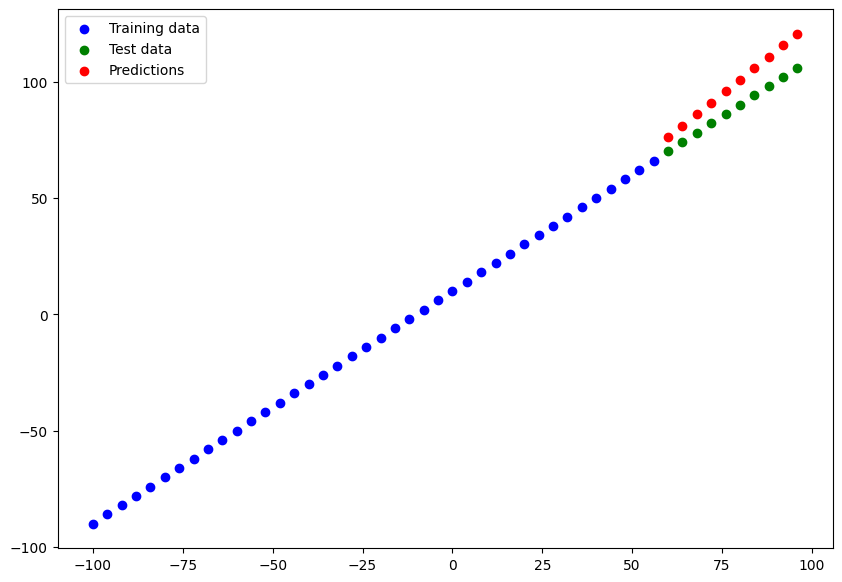

In [52]:
# Make and plot predictions
y_preds_2 = model_2.predict(x_test)
plot_prediction(predictions = y_preds_2)

In [53]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.2477455>,
 <tf.Tensor: shape=(), dtype=float32, numpy=112.44035>)

## Build **model 3**

* 2 layers for 500 epochs

In [54]:
# set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(x_train, axis = -1), y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 11ms/step - loss: 31.7919 - mae: 31.7919
Epoch 2/500
2/2 [==============================] - 0s 12ms/step - loss: 27.0734 - mae: 27.0734
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 32.8675 - mae: 32.8675
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 24.4984 - mae: 24.4984
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 14.5393 - mae: 14.5393
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 11.5904 - mae: 11.5904
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 12.6401 - mae: 12.6401
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 11.0225 - mae: 11.0225
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 39.6035 - mae: 39.6035
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 27.1091 - mae: 27.1091
Epoch 11/500
2/2 [==============================] - 0s 6m

1/1 [==============================] - 0s 77ms/step


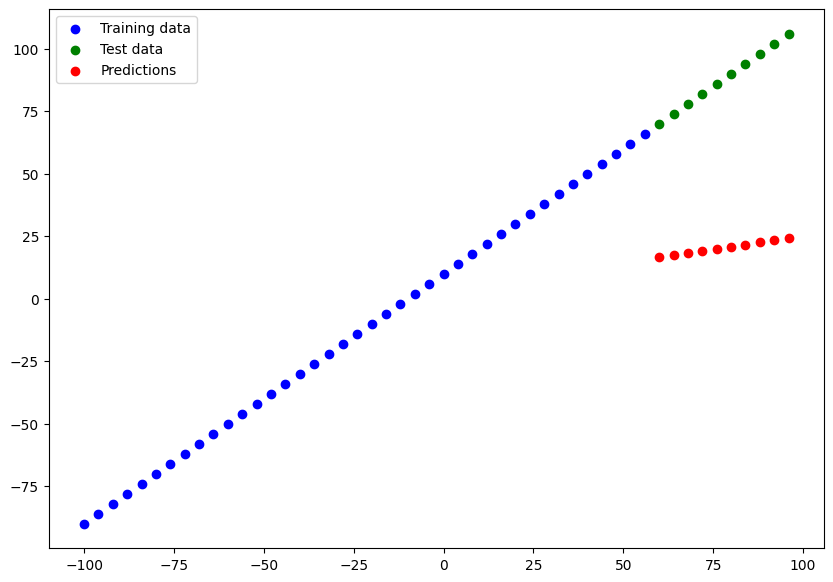

In [55]:
# Make and plot predictions
y_preds_3 = model_3.predict(x_test)
plot_prediction(predictions = y_preds_3)

In [56]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.51043>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4641.45>)

**Note:** You want to start with small experiments (small nodels) and make sure they work and then increase their scale when necessary.


## Compare the results of our experiments

We've run few experiments, let's compare the results.

In [57]:
# Let's compare our model's result using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,"tf.Tensor(21.254217, shape=(), dtype=float32)","tf.Tensor(455.1708, shape=(), dtype=float32)"
1,model_2,"tf.Tensor(10.2477455, shape=(), dtype=float32)","tf.Tensor(112.44035, shape=(), dtype=float32)"
2,model_3,"tf.Tensor(67.51043, shape=(), dtype=float32)","tf.Tensor(4641.45, shape=(), dtype=float32)"


In [58]:
# Another way
# Let's compare our model's result using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,21.254217,455.170807
1,model_2,10.247746,112.440353
2,model_3,67.510429,4641.450195


In [59]:
# Looks like the model 2 is best
# Let's see model 2
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Note:** One of your mail goals should be to minimize the time between your experiments. The more experiments you do, get closer to figuring out which don't work and in turn, get closer to figuring out what does work.Remember the machine learning practioners motto: "experiment, experiment and experiment...."

## Tracking your experiments

one really good habit in machine learning modelling is to track the results of your experiments.

And, when doing so, it can be tedious of you're running lots of experiments.

Luckily, there are tools to help us.

**Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard)

## Saving our model

Saving our model allows us to use them outside the colab (or wherever they are trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SaveModel formet
2. The HDF5 formet

In [60]:
# Save model using the SaveModel formet
model_2.save("best_model_SaveModel_format")

In [61]:
# Save model using the HDF5 formet
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [62]:
# Load in the SaveModel format model
loaded_SaveModel_format = tf.keras.models.load_model("/content/best_model_SaveModel_format")
loaded_SaveModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [63]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [64]:
# COmpare model_2 predictions with SaveModel format model predictions
model_2_preds = model_2.predict(x_test)
loaded_SaveModel_format_preds = loaded_SaveModel_format.predict(x_test)
model_2_preds == loaded_SaveModel_format_preds

1/1 [==============================] - 0s 100ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [65]:
mae(y_true = y_test, y_pred = model_2_preds) == mae(y_true = y_test, y_pred = loaded_SaveModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [66]:
 # Load in a model using the .h5 format
 loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
 loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [67]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [68]:
# COmpare model_2 predictions with h5 format model predictions
model_2_preds = model_2.predict(x_test)
loaded_h5_model_preds = loaded_h5_model.predict(x_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 88ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google colab

If you want to download your files from Google colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".
2. Use code (see the cell below)
3. Save it to Google Drive by connecting Google Drive and Copying it there (see 2nd code cell)  

In [69]:
# Download a file from Google colab
# from google.colab import files
# files.download("/content/best_model_HDF5_format.h5")

In [70]:
# Save a file from colab to google drive ( requires mounting google drive)
# !cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/TensorFlow_Course

In [71]:
# !ls /content/drive/MyDrive/TensorFlow_Course

## A Large example

In [72]:
# Import required libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd


In [73]:
# Read the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [74]:
# Let's try one-hot encode our dataFrame so that its all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [75]:
# create X and Y ( features and Labels)
x = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [76]:
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [77]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [78]:
# Create traing and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
len(x), len(x_train), len(x_test)

(1338, 1070, 268)

In [79]:
# Build a nural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. create a model
insurance_model = tf.keras.Sequential([
   tf.keras.layers.Dense(10),
   tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])
# Fit the model
insurance_model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8592.4678 - mae: 8592.4678
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7878.3271 - mae: 7878.3271
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7536.8110 - mae: 7536.8110
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7746.7554 - mae: 7746.7554
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7761.5977 - mae: 7761.5977
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7624.9810 - mae: 7624.9810
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7613.4634 - mae: 7613.4634
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7693.6606 - mae: 7693.6606
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7627.3242 - mae: 7627.3242
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7718.4561 - mae: 7718.4561

In [80]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8525.3047 - mae: 8525.3047


[8525.3046875, 8525.3046875]

In [81]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now, it looks like our model isn't performing too well... let's try to improve it.

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. same as above but Train for longer ( 200 epochs )  
3. Insert your own experiment here.

In [82]:
# # It didn't work.
# # Build a nural network (sort of like model_2 above)
# tf.random.set_seed(42)

# # 1. create a model
# insurance_model_2 = tf.keras.Sequential([
#    tf.keras.layers.Dense(100),
#    tf.keras.layers.Dense(10),
#    tf.keras.layers.Dense(1)
# ])

# # Compile the model
# insurance_model_2.compile(loss = tf.keras.losses.mae,
#                         optimizer = tf.keras.optimizers.SGD(),
#                         metrics = ["mae"])
# # Fit the model
# insurance_model_2.fit(x_train, y_train, epochs = 100, verbose = 1)

In [83]:
# # Evaluate the large model
# insurance_model_2.evaluate(x_test, y_test)

In [84]:
# Build a nural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. create a model
insurance_model_2 = tf.keras.Sequential([
   tf.keras.layers.Dense(100),
   tf.keras.layers.Dense(10),
   tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_2.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])
# Fit the model
insurance_model_2.fit(x_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13302.6816 - mae: 13302.6816
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13177.5762 - mae: 13177.5762
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12900.8896 - mae: 12900.8896
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12329.0820 - mae: 12329.0820
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11313.7012 - mae: 11313.7012
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9896.0156 - mae: 9896.0156
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8462.7842 - mae: 8462.7842
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7621.3364 - mae: 7621.3364
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7441.9673 - mae: 7441.9673
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7417.0596 - mae:

In [85]:
# Evaluate the large model
insurance_model_2.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5119.4639 - mae: 5119.4639


[5119.4638671875, 5119.4638671875]

In [86]:
insurance_model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8525.3047 - mae: 8525.3047


[8525.3046875, 8525.3046875]

In [87]:
# Build a nural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. create a model
insurance_model_3 = tf.keras.Sequential([
   tf.keras.layers.Dense(100),
   tf.keras.layers.Dense(10),
   tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])
# Fit the model
history = insurance_model_3.fit(x_train, y_train, epochs = 200, verbose = 1)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13275.8096 - mae: 13275.8096
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13096.6924 - mae: 13096.6924
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12717.2021 - mae: 12717.2021
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 11985.3096 - mae: 11985.3096
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10797.2080 - mae: 10797.2080
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9335.0449 - mae: 9335.0449
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8052.8188 - mae: 8052.8188
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7495.5820 - mae: 7495.5820
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7410.9580 - mae: 7410.9580
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7391.2026 - mae:

In [88]:
# Evaluate the large model
insurance_model_3.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3489.1089 - mae: 3489.1089


[3489.10888671875, 3489.10888671875]

Text(0.5, 0, 'epochs')

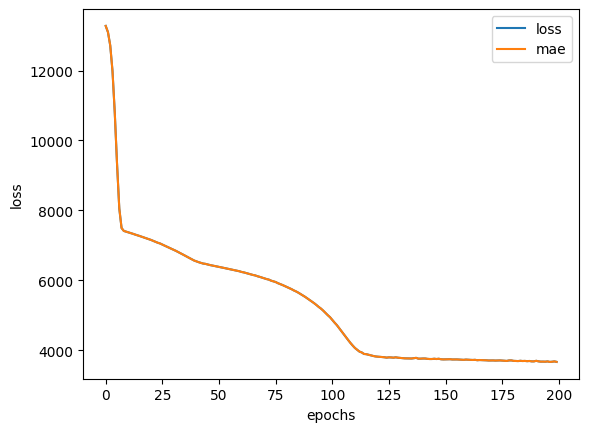

In [89]:
# Plot history (also known as loss curve or training curve )
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Question:** How long should you train for?

It depends. Really.. It depends on the problem you are working on. However, Many people have asked this question before... so TensorFlow has a solution! It's called the EarlyStopping Callback.

Which is a TensorFlow component ypou can add to your model to stop training once it stops improving a certain metrics.

## Preprocessing data (normalization and standardization)

**Normalization:** is a technique often applied as part of data preparation for machine leaming. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in
the ranges of values. For machine learning, every dataset does not require normalization.

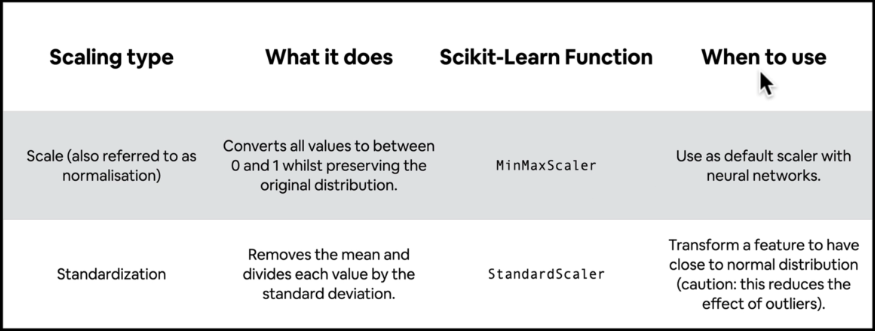

In [90]:
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

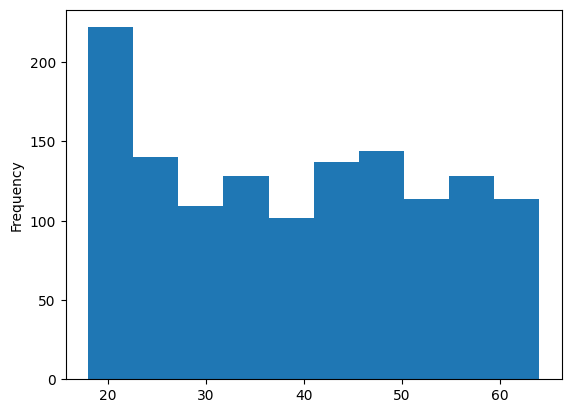

In [91]:
x["age"].plot(kind = "hist")

<Axes: ylabel='Frequency'>

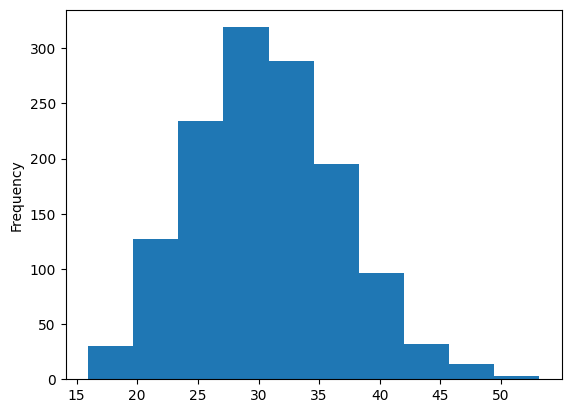

In [92]:
x["bmi"].plot(kind = "hist")

In [94]:
 import pandas as pd
 import matplotlib.pyplot as plt
 import tensorflow as tf

 # Read the insurance DataFrame
 insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
 insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from sklearn

In [102]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),   # Turn all values in three columns between o and 1
    (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])
)

# Create x and y
x = insurance.drop("charges", axis = 1)
y = insurance["charges"]

# Build our train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Fit the column trainsformer to our training data
ct.fit(x_train)

# Transform training and test data with normalization and onehotencoder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [104]:
# What does our data looks like now
x_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [105]:
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [106]:
# Let's check the shape
x_train.shape, x_train_normal.shape

((1070, 6), (1070, 11))

Beautiful. our daat has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [107]:
# Build a neural network modle to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

# 3. Fit the model
insurance_model_4.fit(x_train_normal, y_train, epochs = 100)


Epoch 1/100
34/34 [==============================] - 2s 4ms/step - loss: 13344.4873 - mae: 13344.4873
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13337.8730 - mae: 13337.8730
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13320.4453 - mae: 13320.4453
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13282.1973 - mae: 13282.1973
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13212.2920 - mae: 13212.2920
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 13099.7754 - mae: 13099.7754
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 12934.1221 - mae: 12934.1221
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12704.9600 - mae: 12704.9600
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12401.8730 - mae: 12401.8730
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 12018.05

In [108]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3443.7573 - mae: 3443.7573


[3443.75732421875, 3443.75732421875]